In [1]:
####
library(ncdf4)
library(ggplot2)
library(lubridate)

database <- '/home/jianj0c/dataset/redsea/'

k490_freq_1_folder <- 'K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/'
k490_freq_8_folder <- 'K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/'
k490_freq_30_folder  <- 'K490/Monthly_mean_k490/'

sst_freq_1_folder <- 'SST/Aqua_MODIS_1_Day_L3m_4km_SST/'
sst_freq_8_folder <- 'SST/Aqua_MODIS_8_days_L3m_4km_SST/'
sst_freq_30_folder  <- 'SST/Aqua_MODIS_monthly_L3m_4km_SST/'

chl_freq_1_folder  <- 'Chlorophyll/Daily/'
chl_freq_8_folder  <- 'Chlorophyll/8-Days_composite/'
chl_freq_30_folder  <- 'Chlorophyll/Monthly/'



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




data description

In [2]:


for(file in list(k490_freq_1_folder, k490_freq_8_folder,k490_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/Daily_MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic S

In [3]:
for (i in 1:3){
    print(dim(nc_obj$dim[[i]]$vals))
}
#

[1] 268
[1] 423
[1] 233


In [4]:
longitude<-nc_obj$dim[[1]]$vals
latitude <- nc_obj$dim[[2]]$vals
time <- nc_obj$dim[[3]]$vals


In [5]:
names(nc_obj$var)

[1] "k490" "crs"

In [6]:
class(longitude)

[1] "array"

In [7]:
for(file in list(sst_freq_1_folder, sst_freq_8_folder,sst_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/SST/Aqua_MODIS_1_Day_L3m_4km_SST/Aqua_MODIS_sstd_1day.2003_2012.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float sstMasked[longitude,latitude,time]   
            units: degree_C
            _FillValue: -1.17549402418441e+38
            long_name: sea_surface_temperature
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]],        ID["EPSG",6326]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433],        ID["EPSG",8901]],    CS[ellipsoidal,2],        AXIS["longitude",east,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]],        AXIS["latitude",north,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]]]
            spatial_ref: GE

In [8]:
print.ncdf4(nc_obj)

ERROR: Error in print.ncdf4(nc_obj): could not find function "print.ncdf4"


In [9]:
for(file in list(chl_freq_1_folder, chl_freq_8_folder,chl_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/Chlorophyll/Daily/Daily_Aqua_MODIS_chloA.2003_2012.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float chlorophyllA[longitude,latitude,time]   
            units: mg m-3
            _FillValue: -1.17549402418441e+38
            long_name: Mean Chlorophyll a Concentration
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]],        ID["EPSG",6326]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433],        ID["EPSG",8901]],    CS[ellipsoidal,2],        AXIS["longitude",east,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]],        AXIS["latitude",north,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]]]
            spatial_ref: GEOGC

In [10]:
t_base<-strsplit(ncatt_get(nc_obj,"time","units")$value," ")

In [11]:
date<-ymd(t_base[[1]][3])+dseconds(time)

In [12]:
T_array <- ncvar_get(nc_obj,"k490")

[1] "vobjtovarid4: error #F: I could not find the requsted var (or dimvar) in the file!"
[1] "var (or dimvar) name: k490"
[1] "file name: /home/jianj0c/dataset/redsea/Chlorophyll/Monthly/Aqua_MODIS_chloA_Monthly.2003_2022.nc"


ERROR: Error in vobjtovarid4(nc, varid, verbose = verbose, allowdimvar = TRUE): Variable not found


In [168]:
dim(T_array)[3]

[1] 233

[1]   1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171 181
[20] 191 201 211 221 231

In [176]:
time[i]

[1] 1647388800

In [177]:
date[i]

[1] "2022-03-16"

50

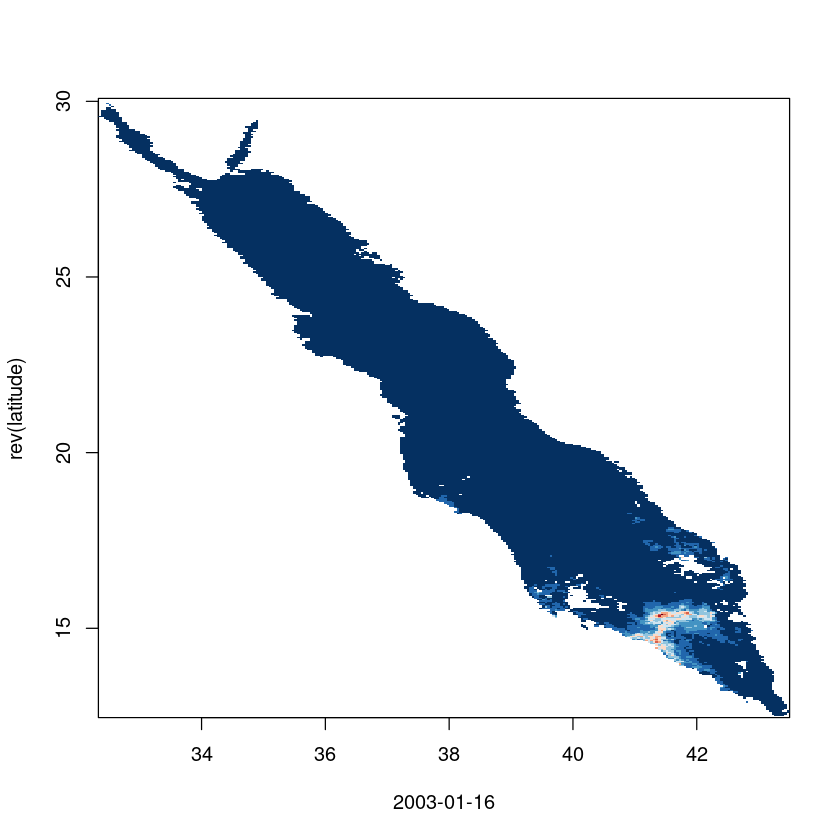

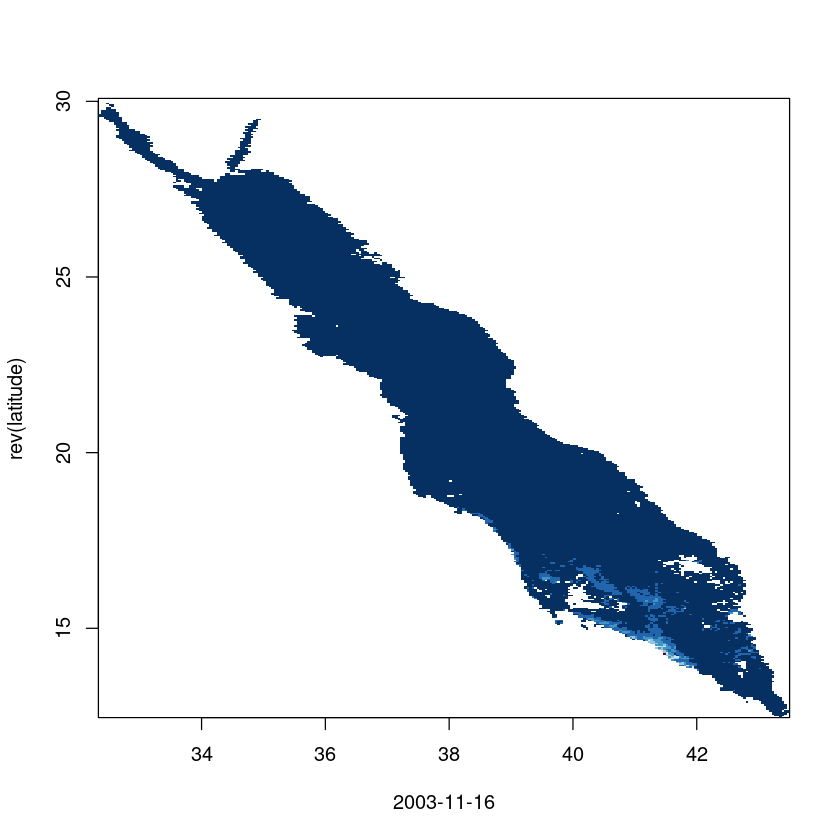

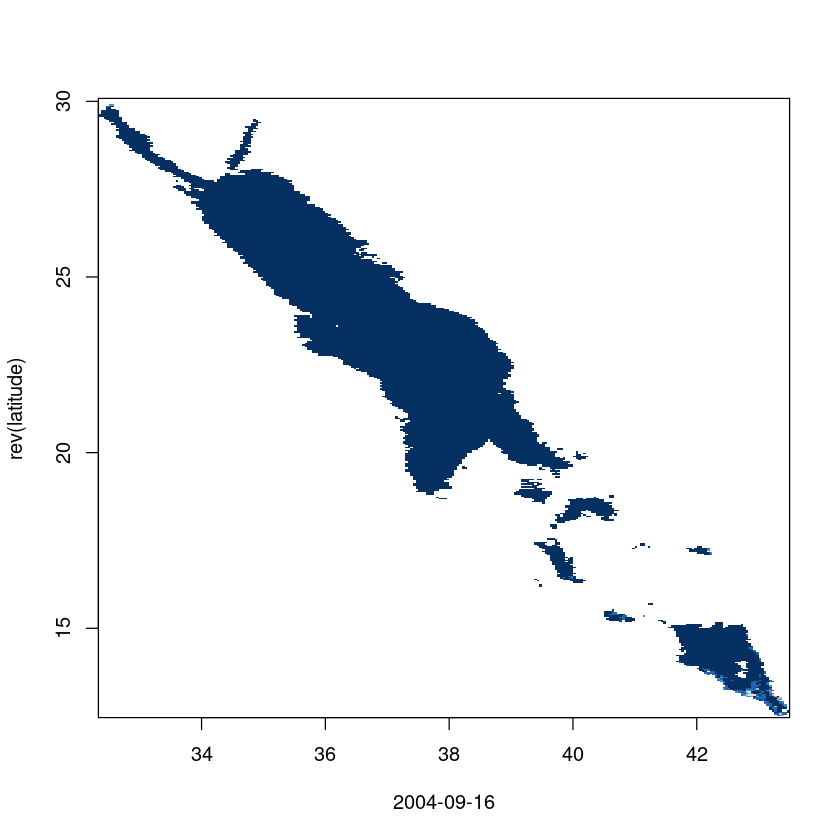

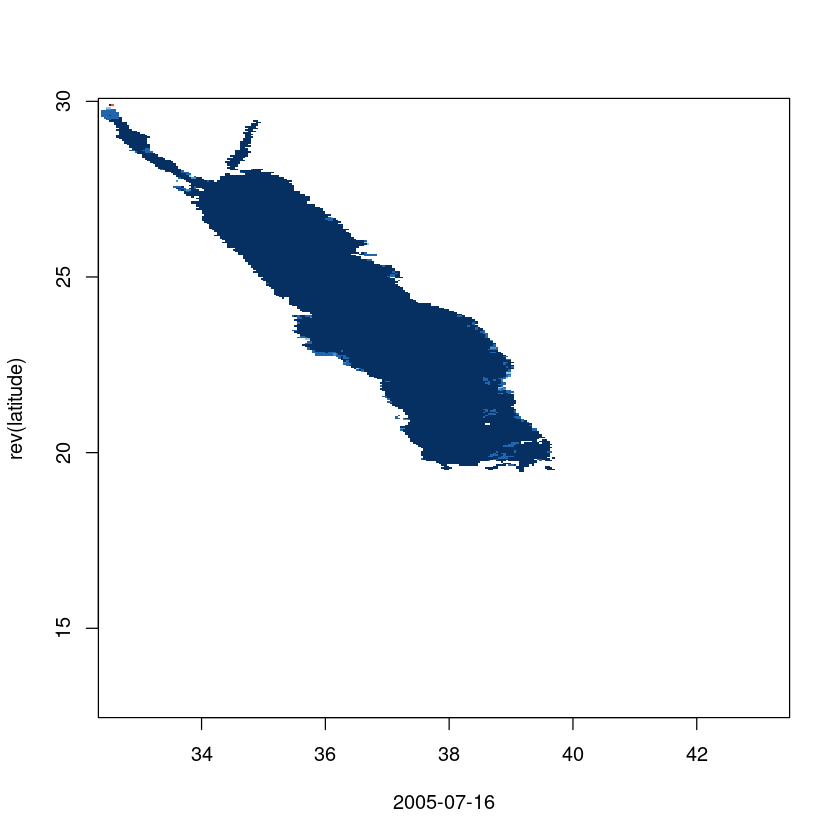

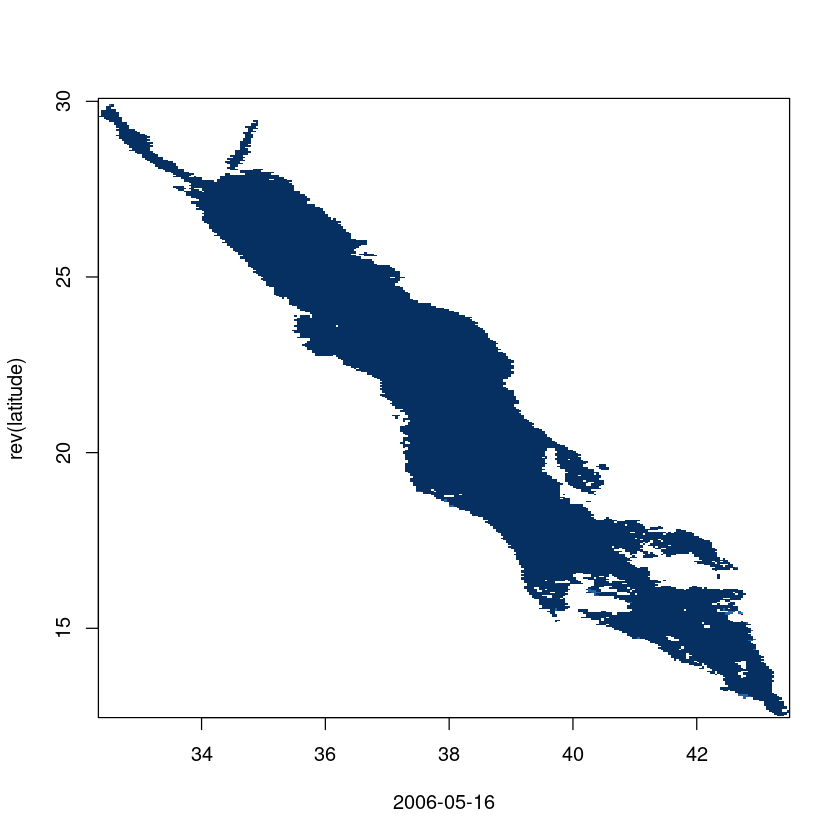

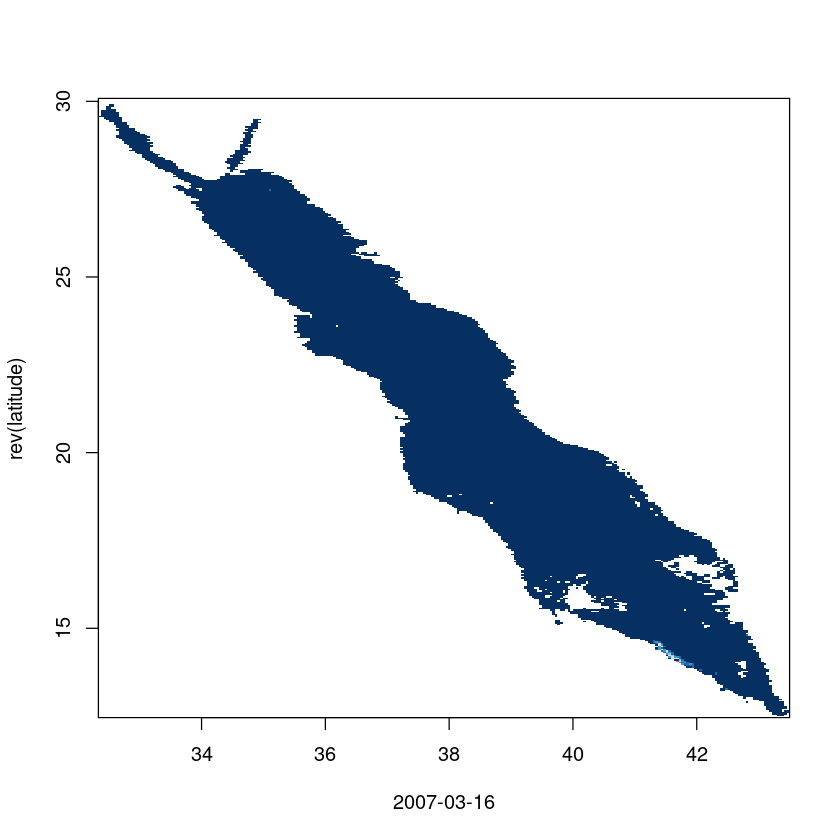

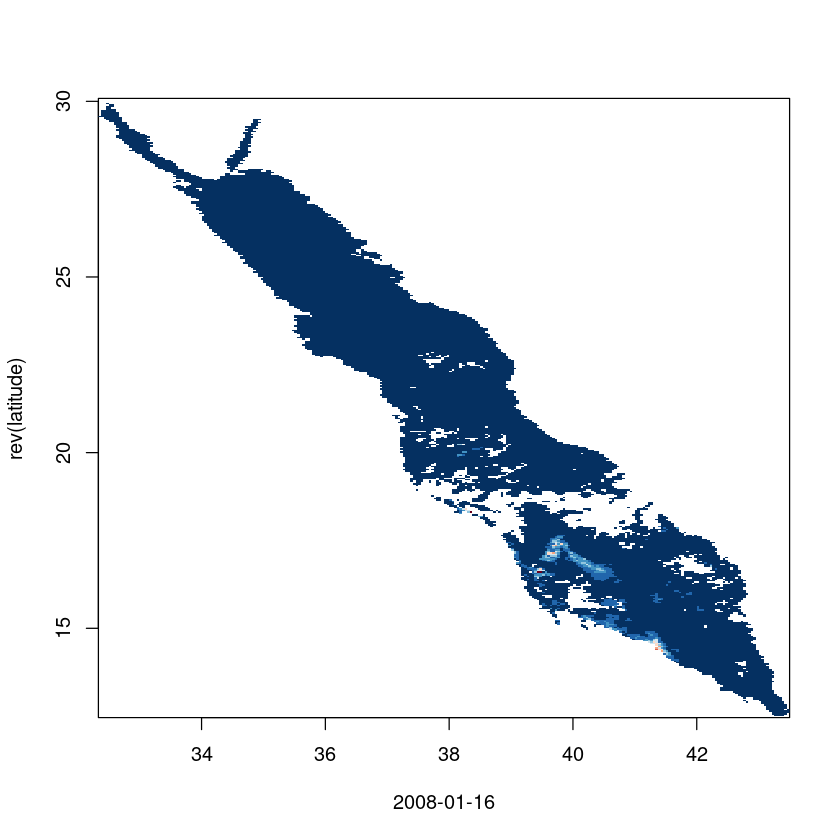

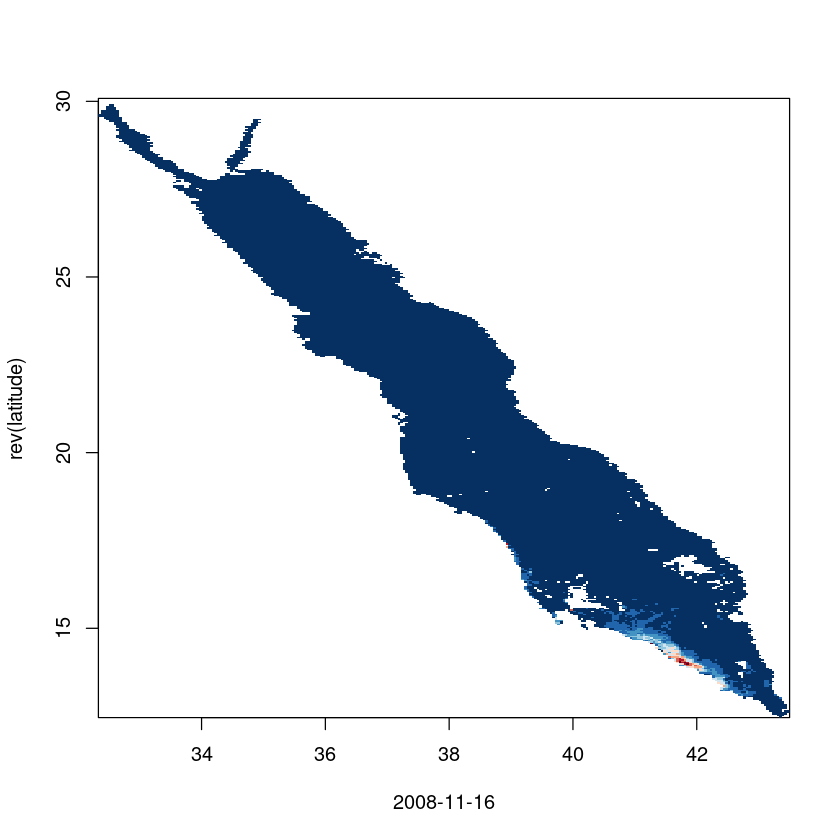

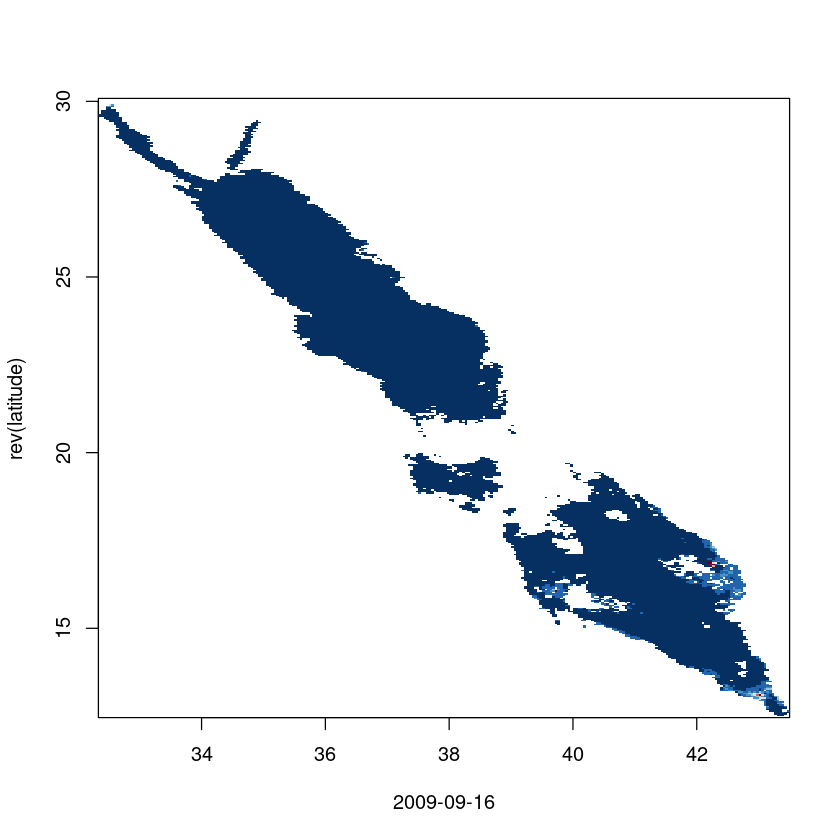

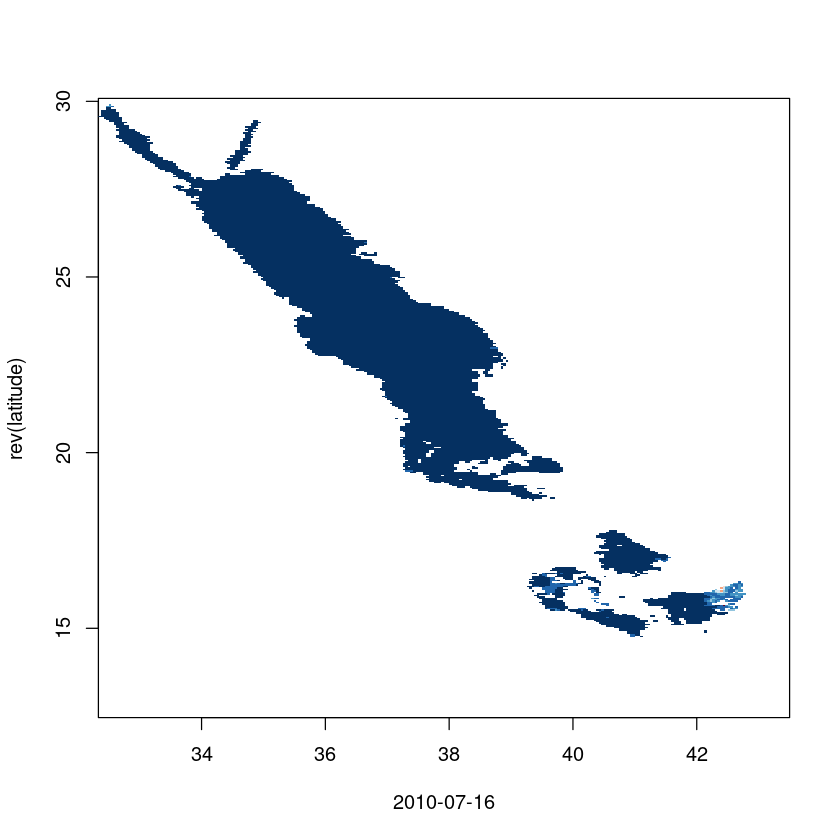

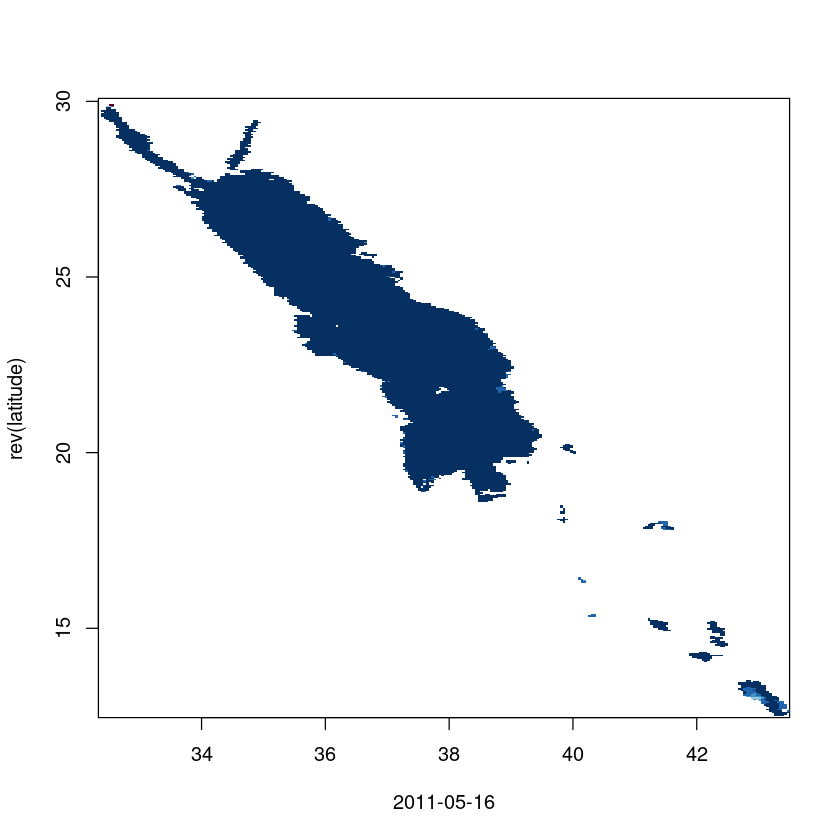

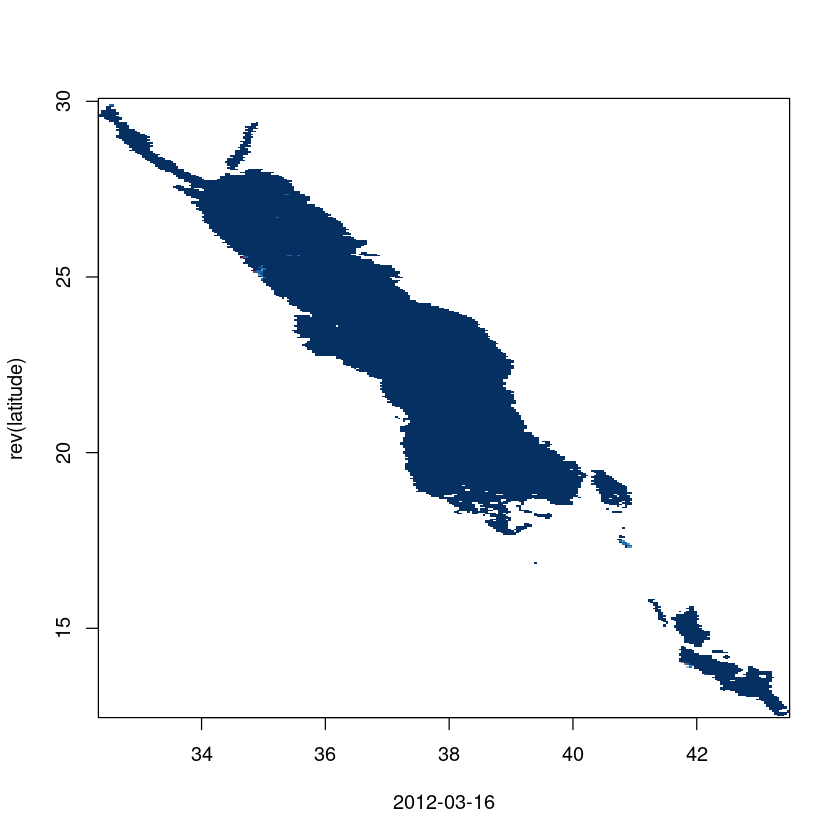

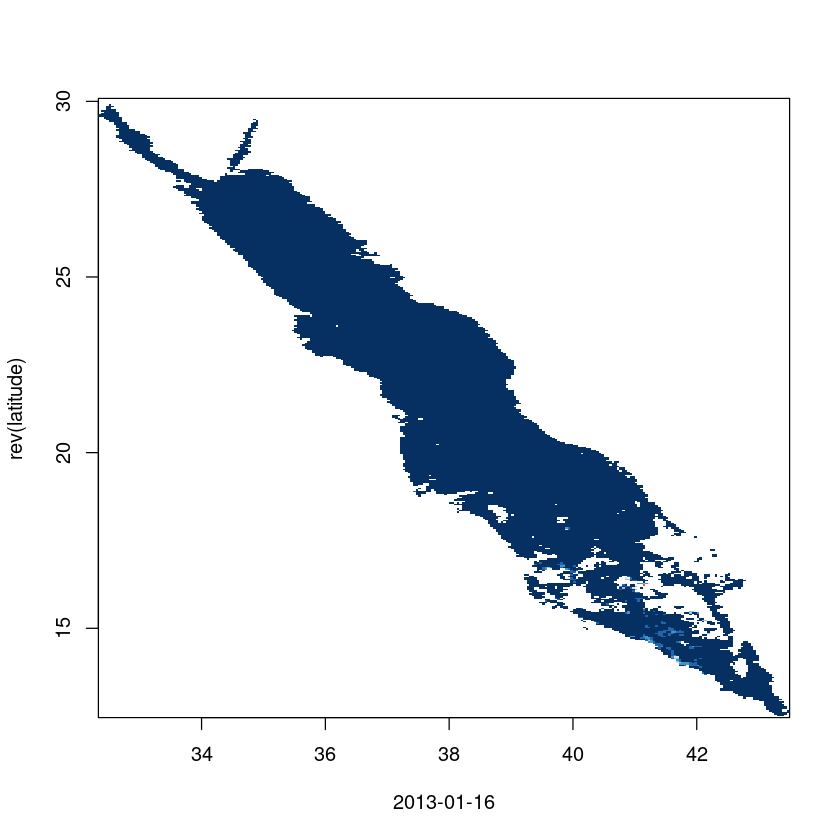

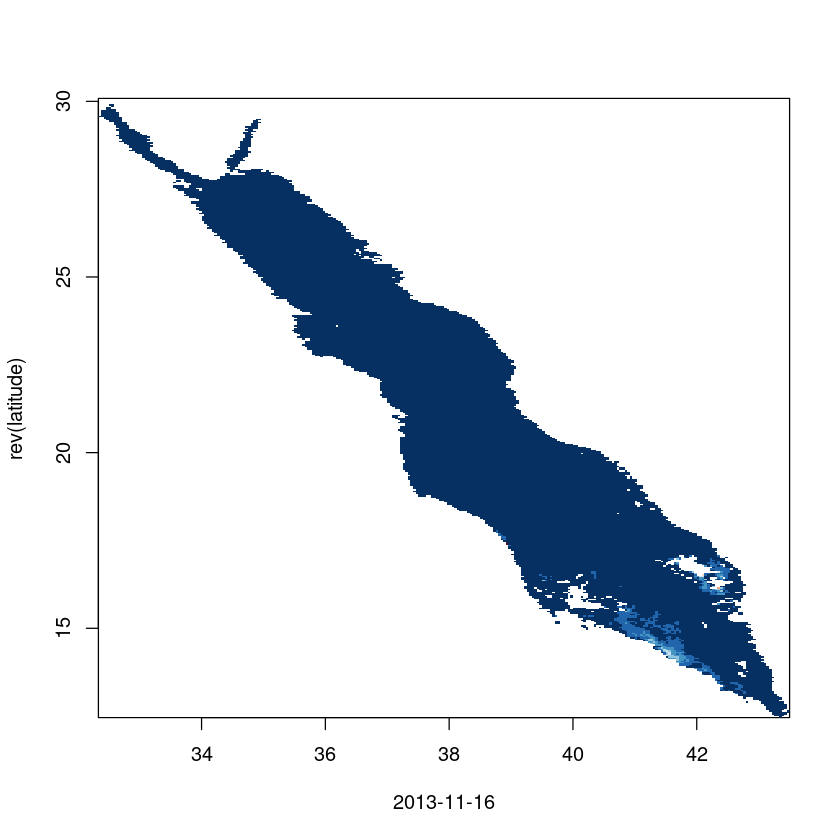

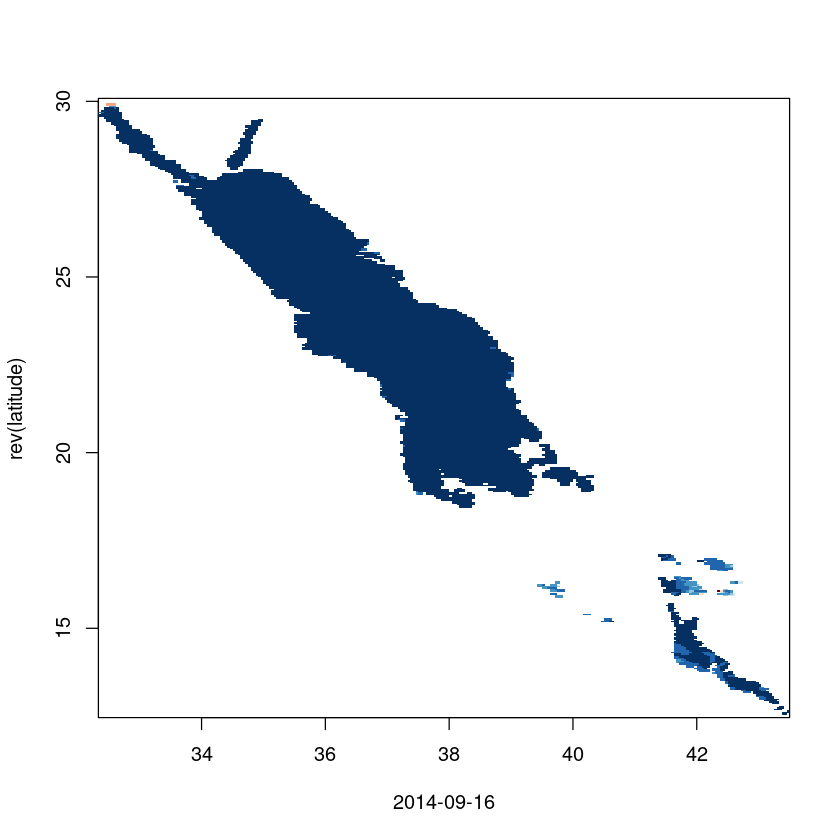

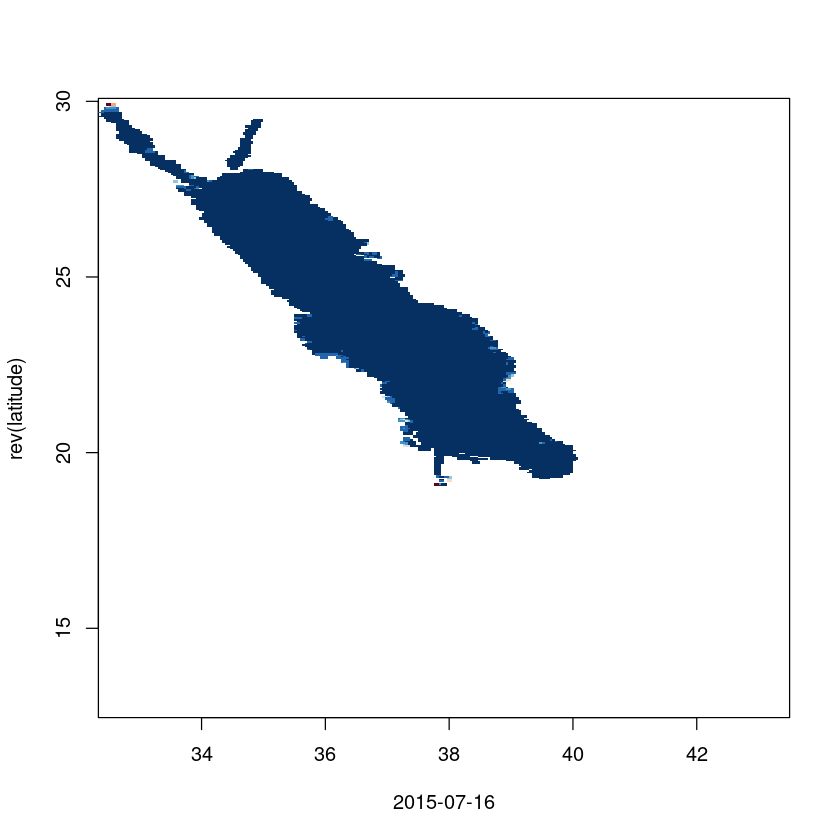

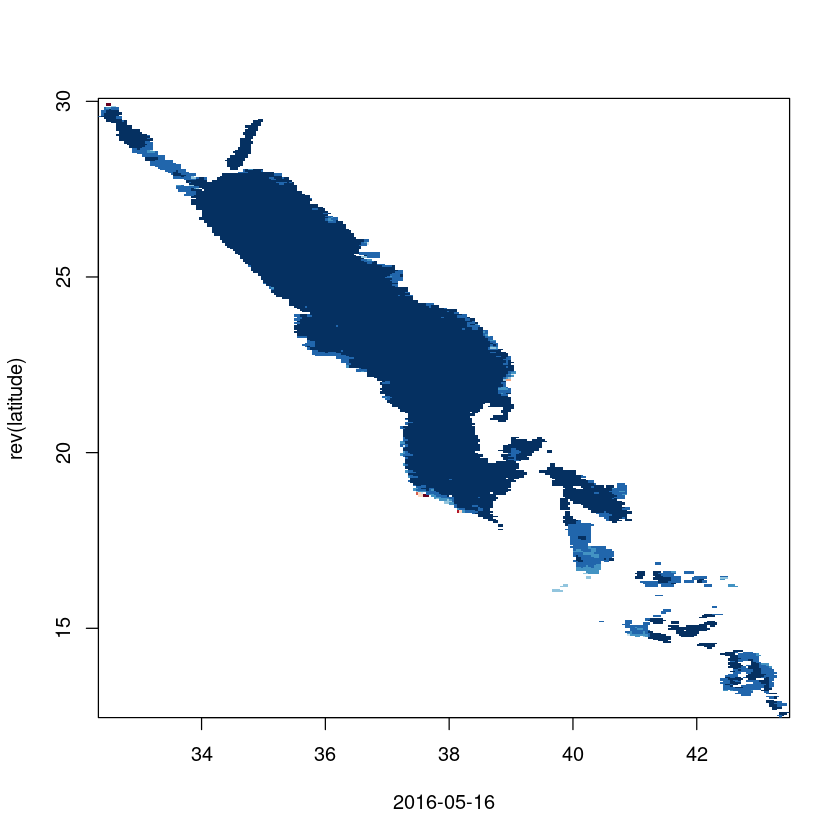

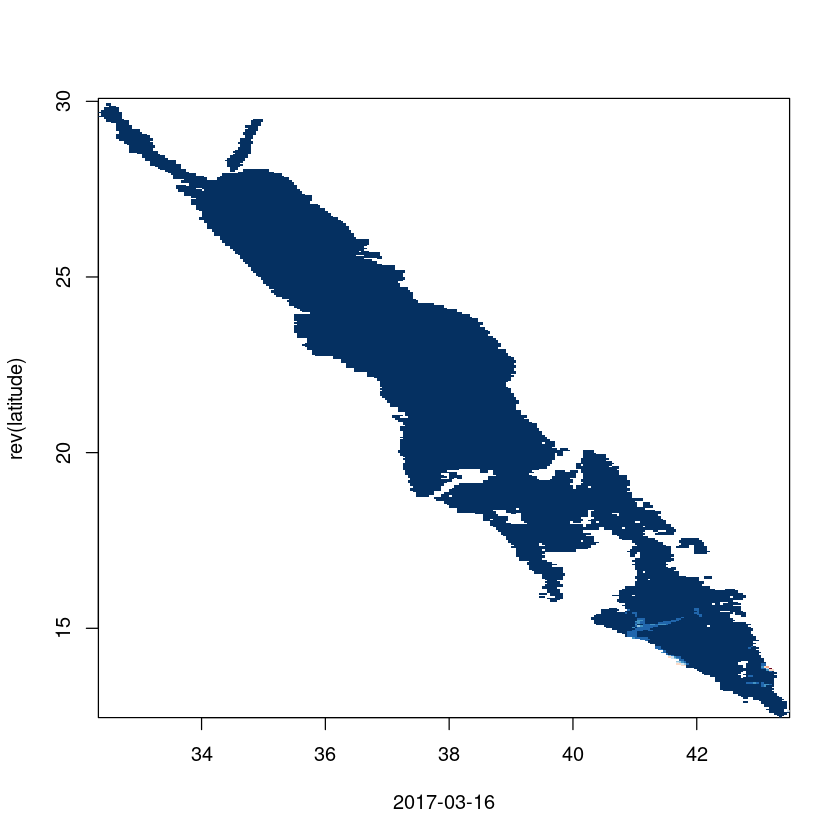

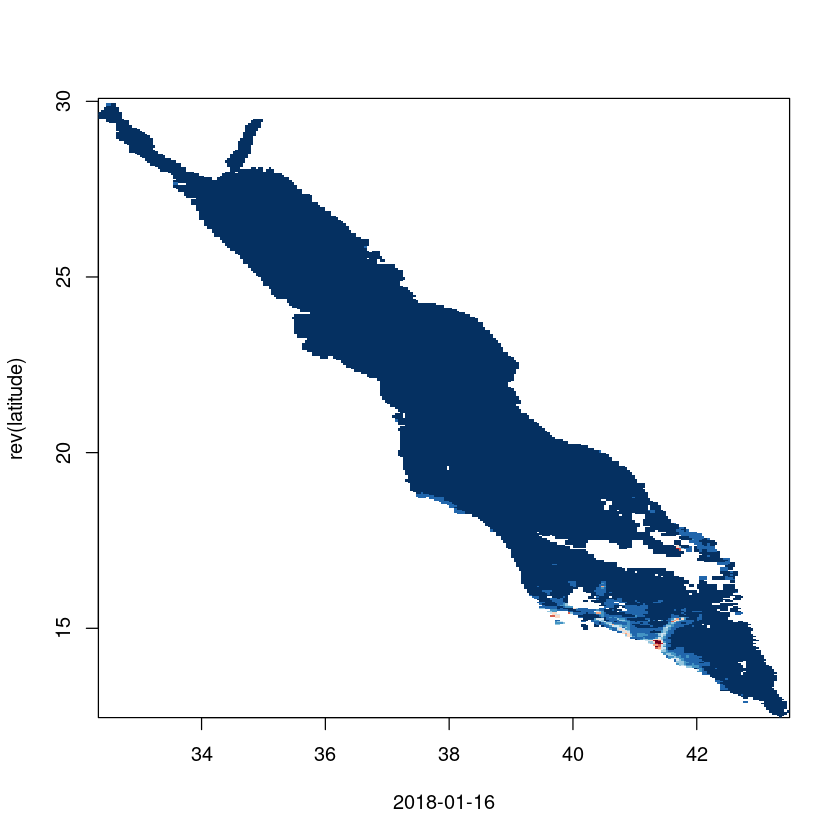

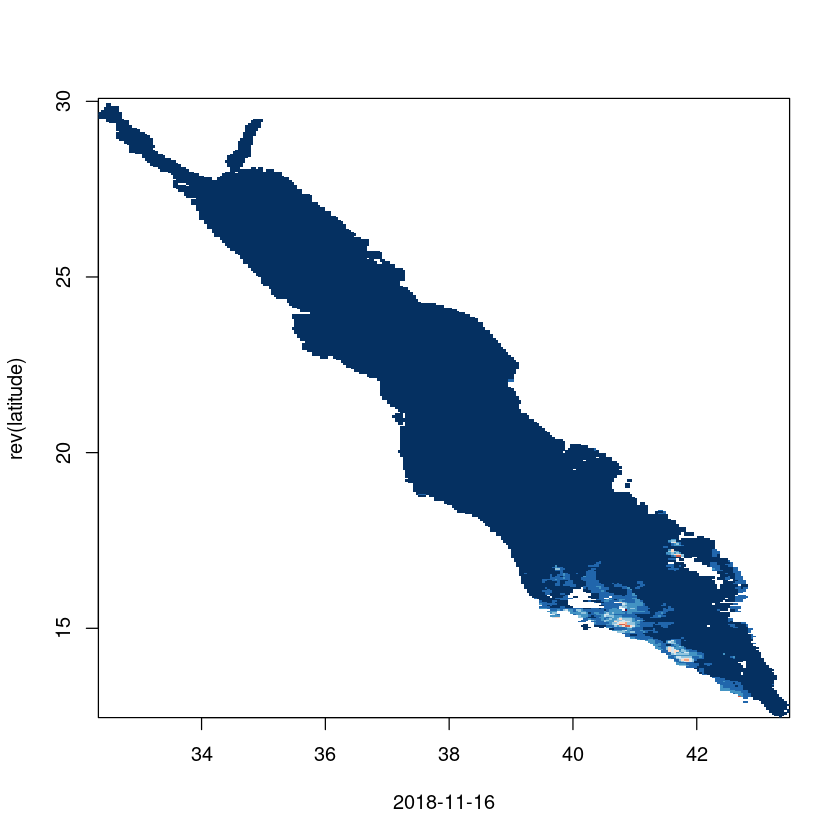

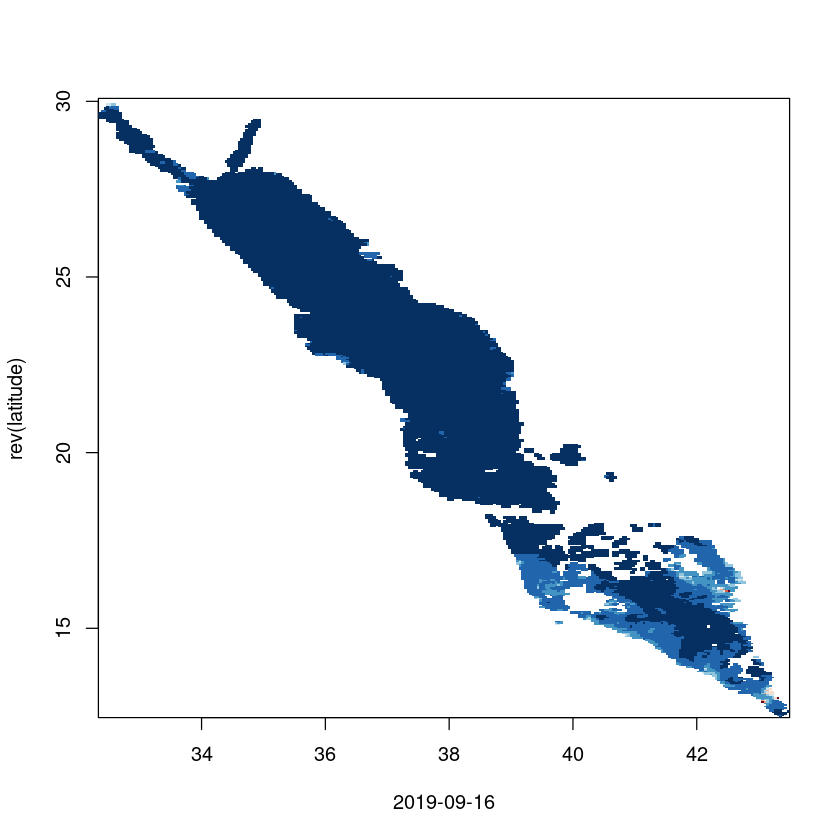

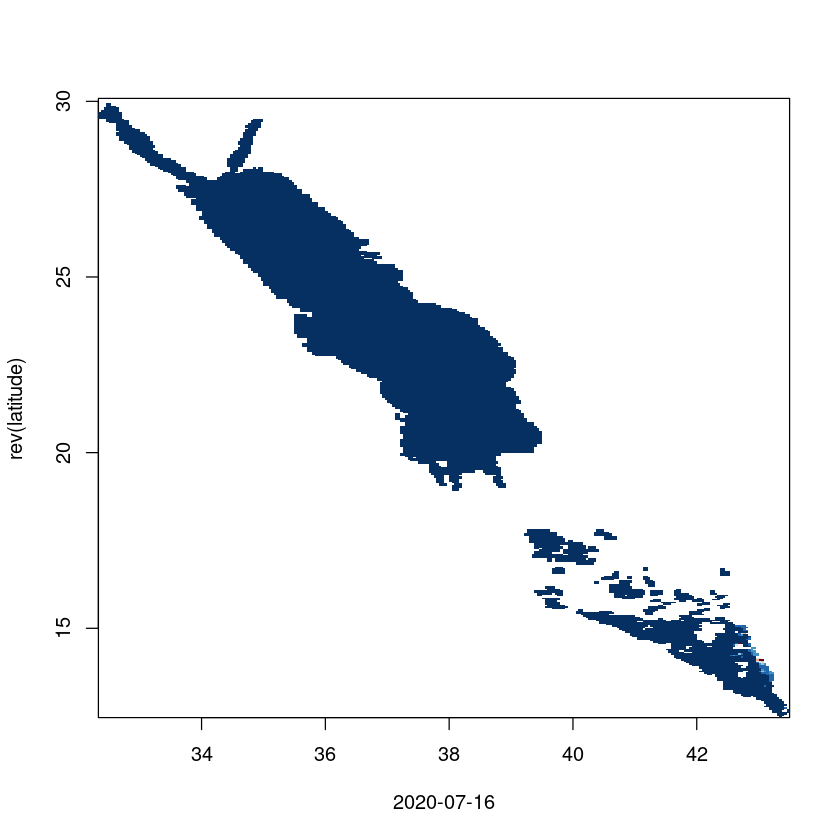

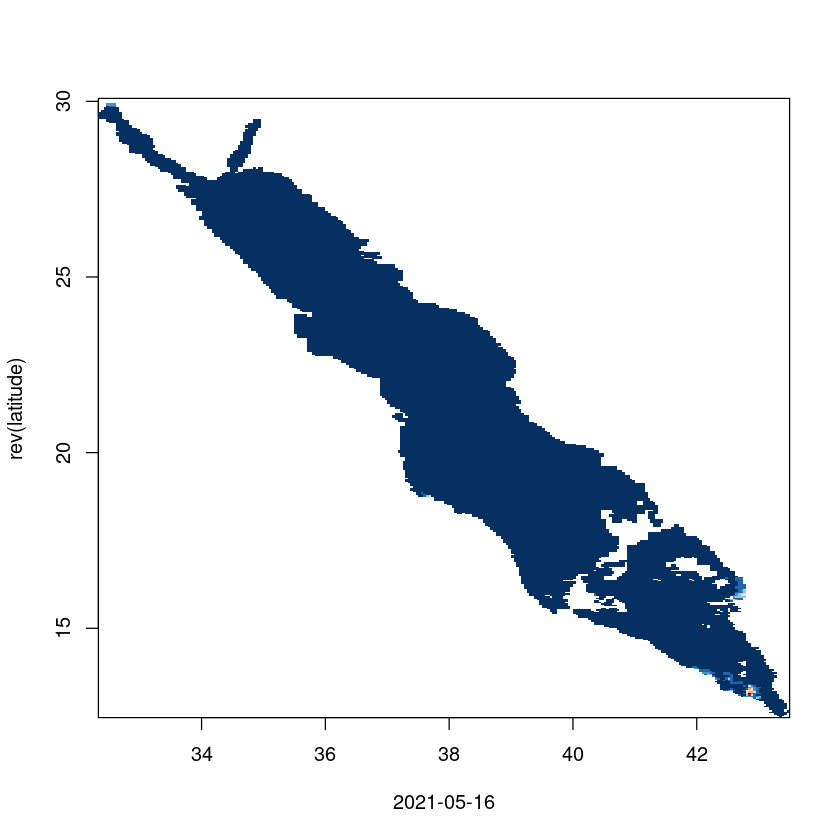

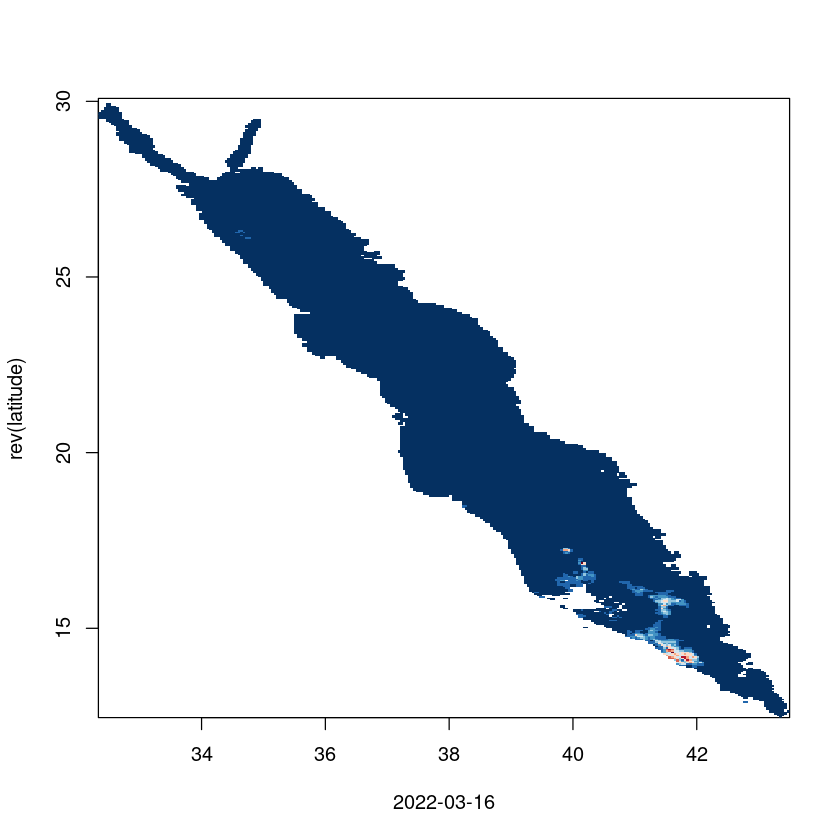

In [182]:
for( i in seq(1,233,10))
{
T_slice <- T_array[,,i]
image(longitude,rev(latitude),T_slice[,dim(T_slice)[2]:1],xlab=date[i],col = rev(brewer.pal(10,"RdBu")))}

100

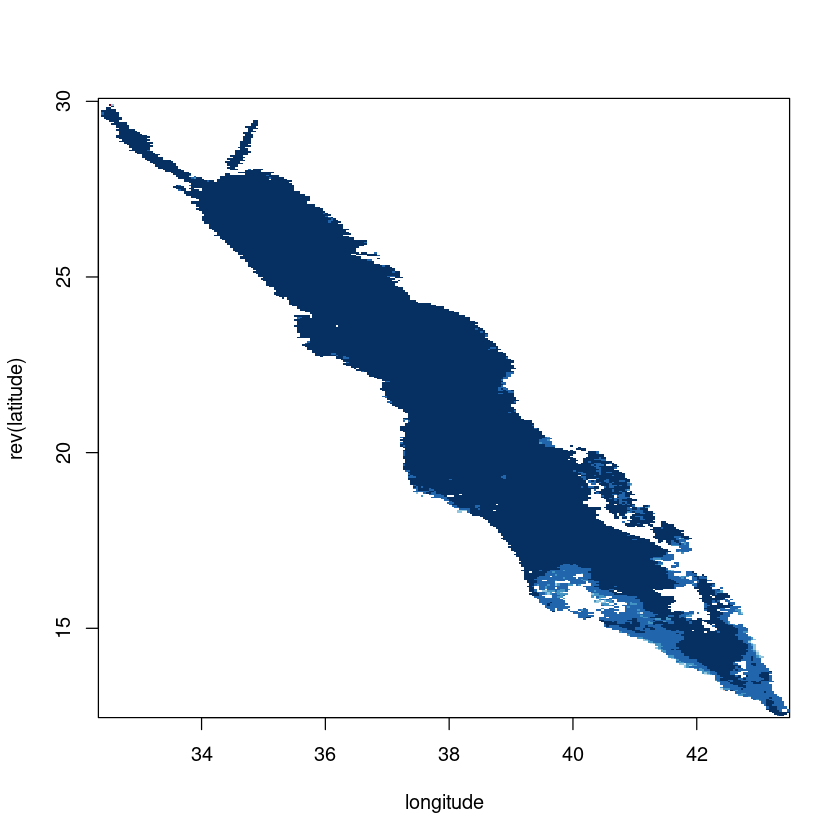

In [170]:
image(longitude,rev(latitude),T_slice[,dim(T_slice)[2]:1], col = rev(brewer.pal(10,"RdBu")))

233

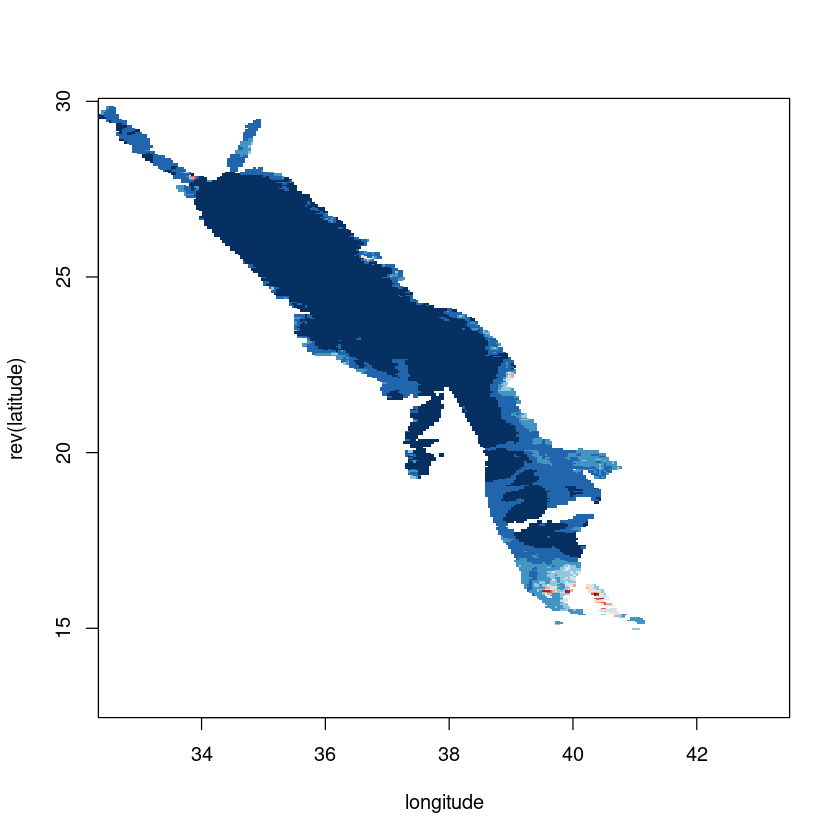

In [167]:
image(longitude,rev(latitude),T_slice[,dim(T_slice)[2]:1], col = rev(brewer.pal(10,"RdBu")))

[1] 423

In [153]:
g i(1:10)

[1] 10  9  8  7  6  5  4  3  2  1

In [154]:
rev(matrix(1:16,nrow=4,ncol=4))

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


In [161]:
x<-matrix(1:16,nrow=4,ncol=4)

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


In [164]:
x[4:1,]

4,8,12,16
3,7,11,15
2,6,10,14
1,5,9,13


In [159]:
Rev(X,margin=2)

ERROR: Error in Rev(X, margin = 2): could not find function "Rev"


In [160]:
X

ERROR: Error in eval(expr, envir, enclos): object 'X' not found


In [140]:
library(RColorBrewer)

In [116]:
sum(is.na(T_slice))

[1] 99233

In [122]:
dim(T_slice)
dim(longitude)
dim(latitude)

[1] 268 423

[1] 268

[1] 423

In [137]:
latitude<-latitude[:,-1]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:20: unexpected ':'
1: latitude<-latitude[:
                       ^


In [ ]:
lm()

In [124]:
filled.contour(longitude,latitude,T_slice, color = terrain.colors, asp = 1)

ERROR: Error in filled.contour(longitude, latitude, T_slice, color = terrain.colors, : increasing 'x' and 'y' values expected


In [134]:
latitude

[1] 30.06250 30.02083 29.97917 29.93750 29.89583 29.85417 29.81250 29.77083
  [9] 29.72917 29.68750 29.64583 29.60417 29.56250 29.52083 29.47917 29.43750
 [17] 29.39583 29.35417 29.31250 29.27083 29.22917 29.18750 29.14583 29.10417
 [25] 29.06250 29.02083 28.97917 28.93750 28.89583 28.85417 28.81250 28.77083
 [33] 28.72917 28.68750 28.64583 28.60417 28.56250 28.52083 28.47917 28.43750
 [41] 28.39583 28.35417 28.31250 28.27083 28.22917 28.18750 28.14583 28.10417
 [49] 28.06250 28.02083 27.97917 27.93750 27.89583 27.85417 27.81250 27.77083
 [57] 27.72917 27.68750 27.64583 27.60417 27.56250 27.52083 27.47917 27.43750
 [65] 27.39583 27.35417 27.31250 27.27083 27.22917 27.18750 27.14583 27.10417
 [73] 27.06250 27.02083 26.97917 26.93750 26.89583 26.85417 26.81250 26.77083
 [81] 26.72917 26.68750 26.64583 26.60417 26.56250 26.52083 26.47917 26.43750
 [89] 26.39583 26.35417 26.31250 26.27083 26.22917 26.18750 26.14583 26.10417
 [97] 26.06250 26.02083 25.97917 25.93750 25.89583 25.85417 25.81250 25.77083
[105] 25.72917 25.68750 25.64583 25.60417 25.56250 25.52083 25.47917 25.43750
[113] 25.39583 25.35417 25.31250 25.27083 25.22917 25.18750 25.14583 25.10417
[121] 25.06250 25.02083 24.97917 24.93750 24.89583 24.85417 24.81250 24.77083
[129] 24.72917 24.68750 24.64583 24.60417 24.56250 24.52083 24.47917 24.43750
[137] 24.39583 24.35417 24.31250 24.27083 24.22917 24.18750 24.14583 24.10417
[145] 24.06250 24.02083 23.97917 23.93750 23.89583 23.85417 23.81250 23.77083
[153] 23.72917 23.68750 23.64583 23.60417 23.56250 23.52083 23.47917 23.43750
[161] 23.39583 23.35417 23.31250 23.27083 23.22917 23.18750 23.14583 23.10417
[169] 23.06250 23.02083 22.97917 22.93750 22.89583 22.85417 22.81250 22.77083
[177] 22.72916 22.68750 22.64583 22.60416 22.56250 22.52083 22.47916 22.43750
[185] 22.39583 22.35416 22.31250 22.27083 22.22916 22.18750 22.14583 22.10416
[193] 22.06250 22.02083 21.97916 21.93750 21.89583 21.85416 21.81250 21.77083
[201] 21.72916 21.68750 21.64583 21.60416 21.56250 21.52083 21.47916 21.43750
[209] 21.39583 21.35416 21.31250 21.27083 21.22916 21.18750 21.14583 21.10416
[217] 21.06250 21.02083 20.97916 20.93750 20.89583 20.85416 20.81250 20.77083
[225] 20.72916 20.68750 20.64583 20.60416 20.56250 20.52083 20.47916 20.43750
[233] 20.39583 20.35416 20.31250 20.27083 20.22916 20.18750 20.14583 20.10416
[241] 20.06250 20.02083 19.97916 19.93750 19.89583 19.85416 19.81250 19.77083
[249] 19.72916 19.68750 19.64583 19.60416 19.56250 19.52083 19.47916 19.43750
[257] 19.39583 19.35416 19.31250 19.27083 19.22916 19.18750 19.14583 19.10416
[265] 19.06250 19.02083 18.97916 18.93750 18.89583 18.85416 18.81250 18.77083
[273] 18.72916 18.68750 18.64583 18.60416 18.56250 18.52083 18.47916 18.43750
[281] 18.39583 18.35416 18.31250 18.27083 18.22916 18.18750 18.14583 18.10416
[289] 18.06250 18.02083 17.97916 17.93750 17.89583 17.85416 17.81250 17.77083
[297] 17.72916 17.68750 17.64583 17.60416 17.56250 17.52083 17.47916 17.43750
[305] 17.39583 17.35416 17.31250 17.27083 17.22916 17.18750 17.14583 17.10416
[313] 17.06250 17.02083 16.97916 16.93750 16.89583 16.85416 16.81250 16.77083
[321] 16.72916 16.68750 16.64583 16.60416 16.56250 16.52083 16.47916 16.43750
[329] 16.39583 16.35416 16.31250 16.27083 16.22916 16.18750 16.14583 16.10416
[337] 16.06250 16.02083 15.97916 15.93750 15.89583 15.85416 15.81250 15.77083
[345] 15.72916 15.68750 15.64583 15.60416 15.56250 15.52083 15.47916 15.43750
[353] 15.39583 15.35416 15.31250 15.27083 15.22916 15.18750 15.14583 15.10416
[361] 15.06250 15.02083 14.97916 14.93750 14.89583 14.85416 14.81250 14.77083
[369] 14.72916 14.68750 14.64583 14.60416 14.56250 14.52083 14.47916 14.43750
[377] 14.39583 14.35416 14.31250 14.27083 14.22916 14.18750 14.14583 14.10416
[385] 14.06250 14.02083 13.97916 13.93750 13.89583 13.85416 13.81250 13.77083
[393] 13.72916 13.68750 13.64583 13.60416 13.56250 13.52083 13.47916 13.43750
[401] 13.39583 13.35416 13.31250 13.27083 13.22916 13.18750 13.14583 13.10416
[409] 13.06250 13.02083 

In [133]:
sum((latitude[2:dim(latitude)]-latitude[1:dim(latitude)-1])>0)

[1] 0

In [120]:
longitude

[1] 32.35417 32.39584 32.43751 32.47917 32.52084 32.56251 32.60417 32.64584
  [9] 32.68751 32.72917 32.77084 32.81251 32.85417 32.89584 32.93751 32.97917
 [17] 33.02084 33.06251 33.10417 33.14584 33.18751 33.22917 33.27084 33.31251
 [25] 33.35417 33.39584 33.43751 33.47917 33.52084 33.56251 33.60417 33.64584
 [33] 33.68751 33.72917 33.77084 33.81251 33.85417 33.89584 33.93751 33.97917
 [41] 34.02084 34.06251 34.10417 34.14584 34.18751 34.22917 34.27084 34.31251
 [49] 34.35417 34.39584 34.43751 34.47917 34.52084 34.56251 34.60417 34.64584
 [57] 34.68751 34.72917 34.77084 34.81251 34.85417 34.89584 34.93751 34.97917
 [65] 35.02084 35.06251 35.10417 35.14584 35.18751 35.22917 35.27084 35.31251
 [73] 35.35417 35.39584 35.43751 35.47917 35.52084 35.56251 35.60417 35.64584
 [81] 35.68751 35.72917 35.77084 35.81251 35.85417 35.89584 35.93751 35.97917
 [89] 36.02084 36.06251 36.10417 36.14584 36.18751 36.22917 36.27084 36.31251
 [97] 36.35417 36.39584 36.43751 36.47917 36.52084 36.56251 36.60417 36.64584
[105] 36.68751 36.72917 36.77084 36.81251 36.85417 36.89584 36.93751 36.97917
[113] 37.02084 37.06251 37.10417 37.14584 37.18751 37.22917 37.27084 37.31251
[121] 37.35417 37.39584 37.43751 37.47917 37.52084 37.56251 37.60417 37.64584
[129] 37.68751 37.72917 37.77084 37.81251 37.85417 37.89584 37.93751 37.97917
[137] 38.02084 38.06251 38.10417 38.14584 38.18751 38.22917 38.27084 38.31251
[145] 38.35417 38.39584 38.43751 38.47917 38.52084 38.56251 38.60417 38.64584
[153] 38.68751 38.72917 38.77084 38.81251 38.85417 38.89584 38.93751 38.97917
[161] 39.02084 39.06251 39.10417 39.14584 39.18751 39.22917 39.27084 39.31251
[169] 39.35417 39.39584 39.43751 39.47917 39.52084 39.56251 39.60417 39.64584
[177] 39.68751 39.72917 39.77084 39.81251 39.85417 39.89584 39.93751 39.97917
[185] 40.02084 40.06251 40.10417 40.14584 40.18751 40.22917 40.27084 40.31251
[193] 40.35417 40.39584 40.43751 40.47917 40.52084 40.56251 40.60417 40.64584
[201] 40.68751 40.72917 40.77084 40.81251 40.85417 40.89584 40.93751 40.97917
[209] 41.02084 41.06251 41.10417 41.14584 41.18751 41.22917 41.27084 41.31251
[217] 41.35417 41.39584 41.43751 41.47917 41.52084 41.56251 41.60417 41.64584
[225] 41.68751 41.72917 41.77084 41.81251 41.85417 41.89584 41.93751 41.97917
[233] 42.02084 42.06251 42.10417 42.14584 42.18751 42.22917 42.27084 42.31251
[241] 42.35417 42.39584 42.43751 42.47917 42.52084 42.56251 42.60417 42.64584
[249] 42.68751 42.72917 42.77084 42.81251 42.85417 42.89584 42.93751 42.97917
[257] 43.02084 43.06251 43.10417 43.14584 43.18751 43.22917 43.27084 43.31251
[265] 43.35417 43.39584 43.43751 43.47917

In [113]:
dim(latitude)

[1] 423

In [114]:
dim(T_slice)

[1] 268 423

In [ ]:
ncvar_get(nc_obj,)

In [75]:
yt_base[[1]][2]

[1] "1970-1-1 00:00:00"

In [66]:
ncatt_get(nc_obj,"time","units")$value

[1] "seconds since 1970-1-1 00:00:00"

In [63]:
length(t_base)

[1] 1

In [55]:
ymd(t_base)

Warning message:
“All formats failed to parse. No formats found.”


[1] NA

In [27]:
for (okok in c){
    print(okok)

}

[1] "../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc"
[1] "../../dataset/redsea/K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/Daily_MODIS_k490.2003.nc"
[1] "../../dataset/redsea/K490/Monthly_mean_k490/Monthly_Aqua_MODIS_k490_Red_Sea.nc"


In [15]:
data <- nc_open(data_set_path,verbose = FALSE)
# nc_close(data), nc_sync(data) flush in to disk
print(data)

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

In [7]:
data

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



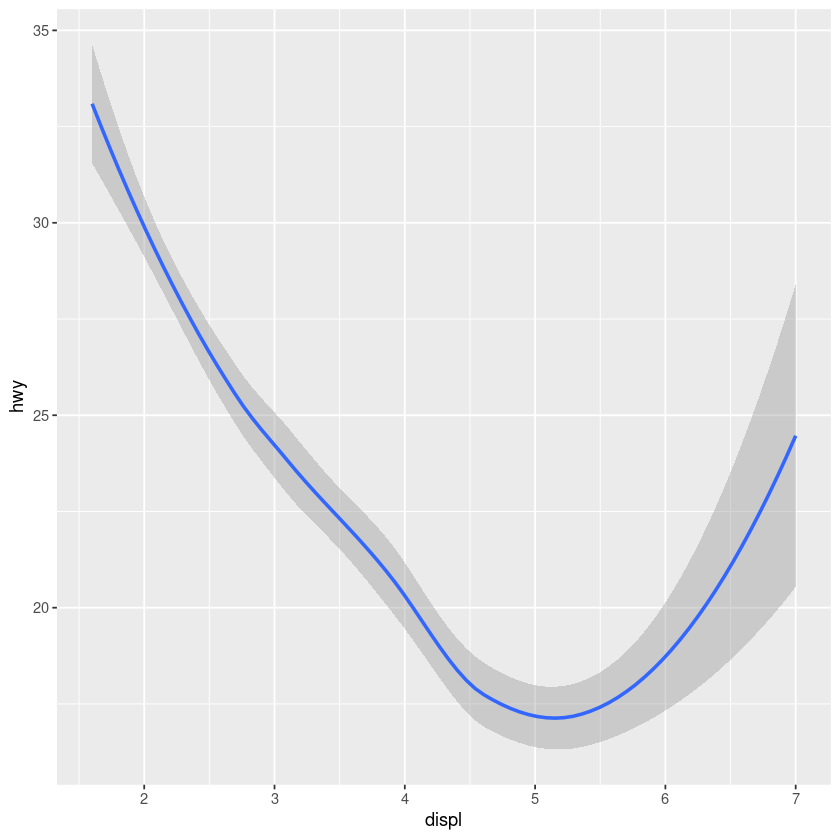

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



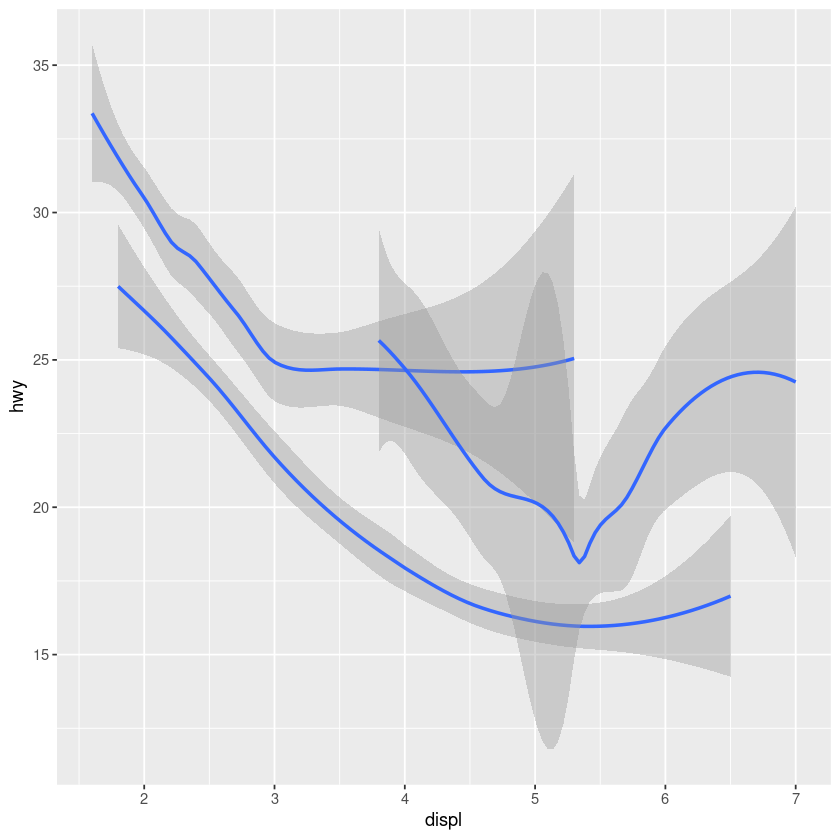

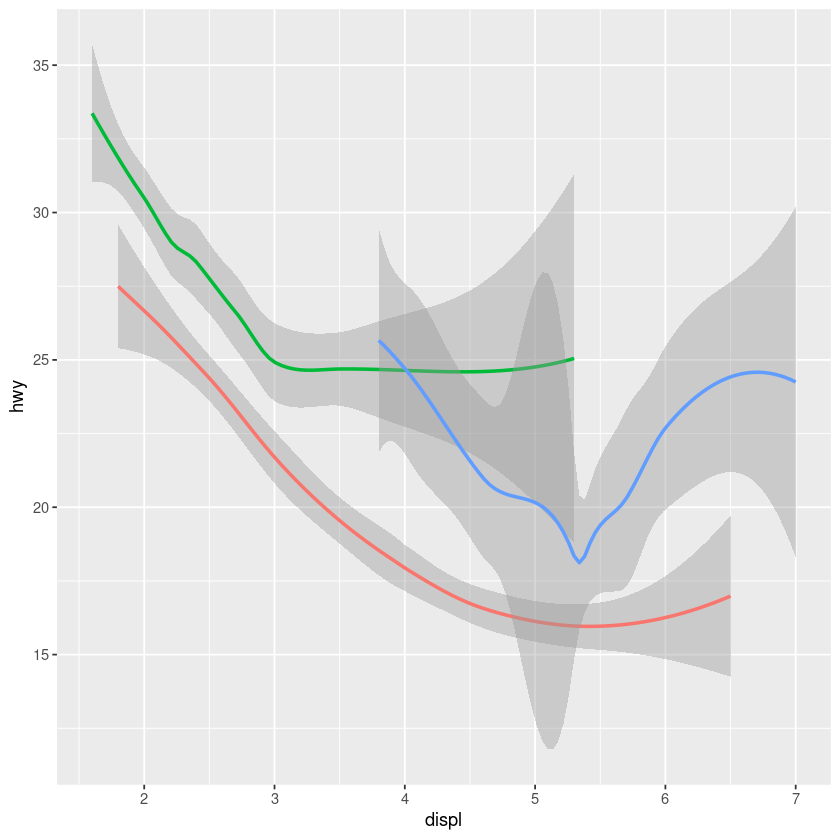

In [3]:
library(ggplot)
ggplot(data = mpg) +
 geom_smooth(mapping = aes(x = displ, y = hwy))
ggplot(data = mpg) +
 geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
ggplot(data = mpg) +
 geom_smooth(
 mapping = aes(x = displ, y = hwy, color = drv),
 show.legend = FALSE
 )
 a  <- 3

In [2]:
library(ggplot2)

In [10]:
dir(nc)

['Conventions',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_close',
 '_close_mem',
 '_enddef',
 '_getname',
 '_grpid',
 '_isopen',
 '_ncstring_attrs__',
 '_redef',
 'close',
 'cmptypes',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'created_by',
 'data_model',
 'date',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'fromcdl',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'has_blosc_filter',
 'has_bzip2_filter',
 'has_szip_filter',
 'has_zstd_filter',
 'isopen',
 'keepweakref',
 'name',
 'ncattrs',
 

In [4]:
for var in nc.variables.keys():
    data=nc.variables[var][:].data
    print(var,data.shape)

longitude (268,)
latitude (423,)
time (890,)
chlorophyllA (890, 423, 268)
crs ()


In [7]:
#看出是逐时数据
import datetime
time=nc.variables['time'][:].data
print(time[:10])
for i in range(3):
    #tstamp=(time[i]-613608)*3600 #1900年1月1日零时距离1970年1月1日零时有613608个小时
    date= datetime.datetime.utcfromtimestamp(time[i])
    print (date.strftime("%Y-%m-%d %H:%M:%S"))


[1.0417248e+09 1.0424160e+09 1.0431072e+09 1.0437984e+09 1.0444896e+09
 1.0451808e+09 1.0458720e+09 1.0465632e+09 1.0472544e+09 1.0479456e+09]
2003-01-05 00:00:00
2003-01-13 00:00:00
2003-01-21 00:00:00


In [9]:
data=nc.variables['t2m'][:]
long= nc.variables['longitude'][:]  
lati= nc.variables['latitude'][:] 
plt.contourf(long,lati,data[116,:,:]-273) #转为摄氏度
plt.colorbar()

KeyError: 't2m'